**Map of the Institutions of CWP Collaborators**

We published the so-called "Community White Paper" a few years ago, following a year long series of workshops:

[A Roadmap for HEP Software and Computing R&D for the 2020s](https://link.springer.com/article/10.1007%2Fs41781-018-0018-8)

One noticable thing about the workshops and the resulting paper was that countries outside of Europe and the US were somewhat underrepresented. This notebook uses some CSV files I made from the author list of that paper to try to make a map graphic to show this.

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

import csv

In [43]:
# First the author list (with university key)
with open('authors.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=':')
    AuthorKey = {rows[2]:rows[0] for rows in csv_reader}

#for mykey,myvalue in AuthorKey.items():
#    print (mykey + " => " + myvalue)

In [44]:
# Next the Institute list (with country map)
with open('institutes.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=':')
    InstituteKey2Name = {rows[0]:rows[2] for rows in csv_reader}
with open('institutes.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=':')
    InstituteKey2Country = {rows[0]:rows[1] for rows in csv_reader}

#for mykey,myvalue in InstituteKey2Name.items():
#    print (mykey + " => " + myvalue)
    
for mykey,myvalue in InstituteKey2Country.items():
    print (mykey + " => " + myvalue)

1 => US
2 => US
3 => BR
4 => FR
5 => CERN
6 => US
7 => ES
8 => MX
9 => IT
10 => ZA
11 => US
12 => US
13 => DE
14 => CH
15 => CH
16 => US
17 => DE
18 => FI
19 => IT
20 => ES
21 => ES
22 => ES
23 => CN
24 => US
25 => IT
26 => IT
27 => IT
28 => IT
29 => IT
30 => IT
31 => IT
32 => IT
33 => IT
34 => IT
35 => IT
36 => IT
37 => FR
38 => UK
39 => FR
40 => US
41 => SL
42 => DE
43 => PL
44 => KR
45 => FR
46 => US
47 => PT
48 => FR
49 => DE
50 => FR
51 => FR
52 => FR
53 => US
54 => DE
55 => DK
56 => NL
57 => US
58 => US
59 => ES
60 => RU
61 => UK
62 => UK
63 => US
64 => US
65 => DE
66 => FR
67 => TW
68 => IN
69 => DE
70 => CA
71 => US
72 => UK
73 => CA
74 => US
75 => US
76 => UK
77 => ZA
78 => CA
79 => US
80 => US
81 => US
82 => US
83 => UK
84 => KR
85 => CH
86 => UK
87 => DE
88 => US
89 => UK
90 => SL
91 => SE
92 => UK
93 => SL
94 => US
95 => US
96 => PT
97 => US
98 => US
99 => US
100 => US
101 => US
102 => NO
103 => ES
104 => UK
105 => US
106 => US
107 => US
108 => BR
109 => IT
110 => US
111 =>

In [45]:
# Initialize counters
countrycount = {}
institutecount = {}

for mykey,myvalue in InstituteKey2Country.items():
    countrycount[myvalue]=0  # will initialize multiple times, but that is fine

for mykey,myvalue in InstituteKey2Name.items():
    institutecount[mykey]=0

# Do the sums by country
for mykey,myvalue in AuthorKey.items():
    #myinstitute = InstituteKey2Name[myvalue]
    mycountry = InstituteKey2Country[myvalue]
    institutecount[myvalue]+=1
    countrycount[mycountry]+=1

for mykey,myvalue in countrycount.items():
    print (mykey + " => " + str(myvalue))


US => 100
BR => 2
FR => 16
CERN => 72
ES => 9
MX => 1
IT => 20
ZA => 1
DE => 23
CH => 4
FI => 1
CN => 4
UK => 31
SL => 3
PL => 1
KR => 2
PT => 1
DK => 1
NL => 4
RU => 1
TW => 1
IN => 2
CA => 4
SE => 2
NO => 2
BG => 1
VN => 1


Text(-130, -15, 'Origins of Authors\nof HEP Software and\nComputing Roadmap')

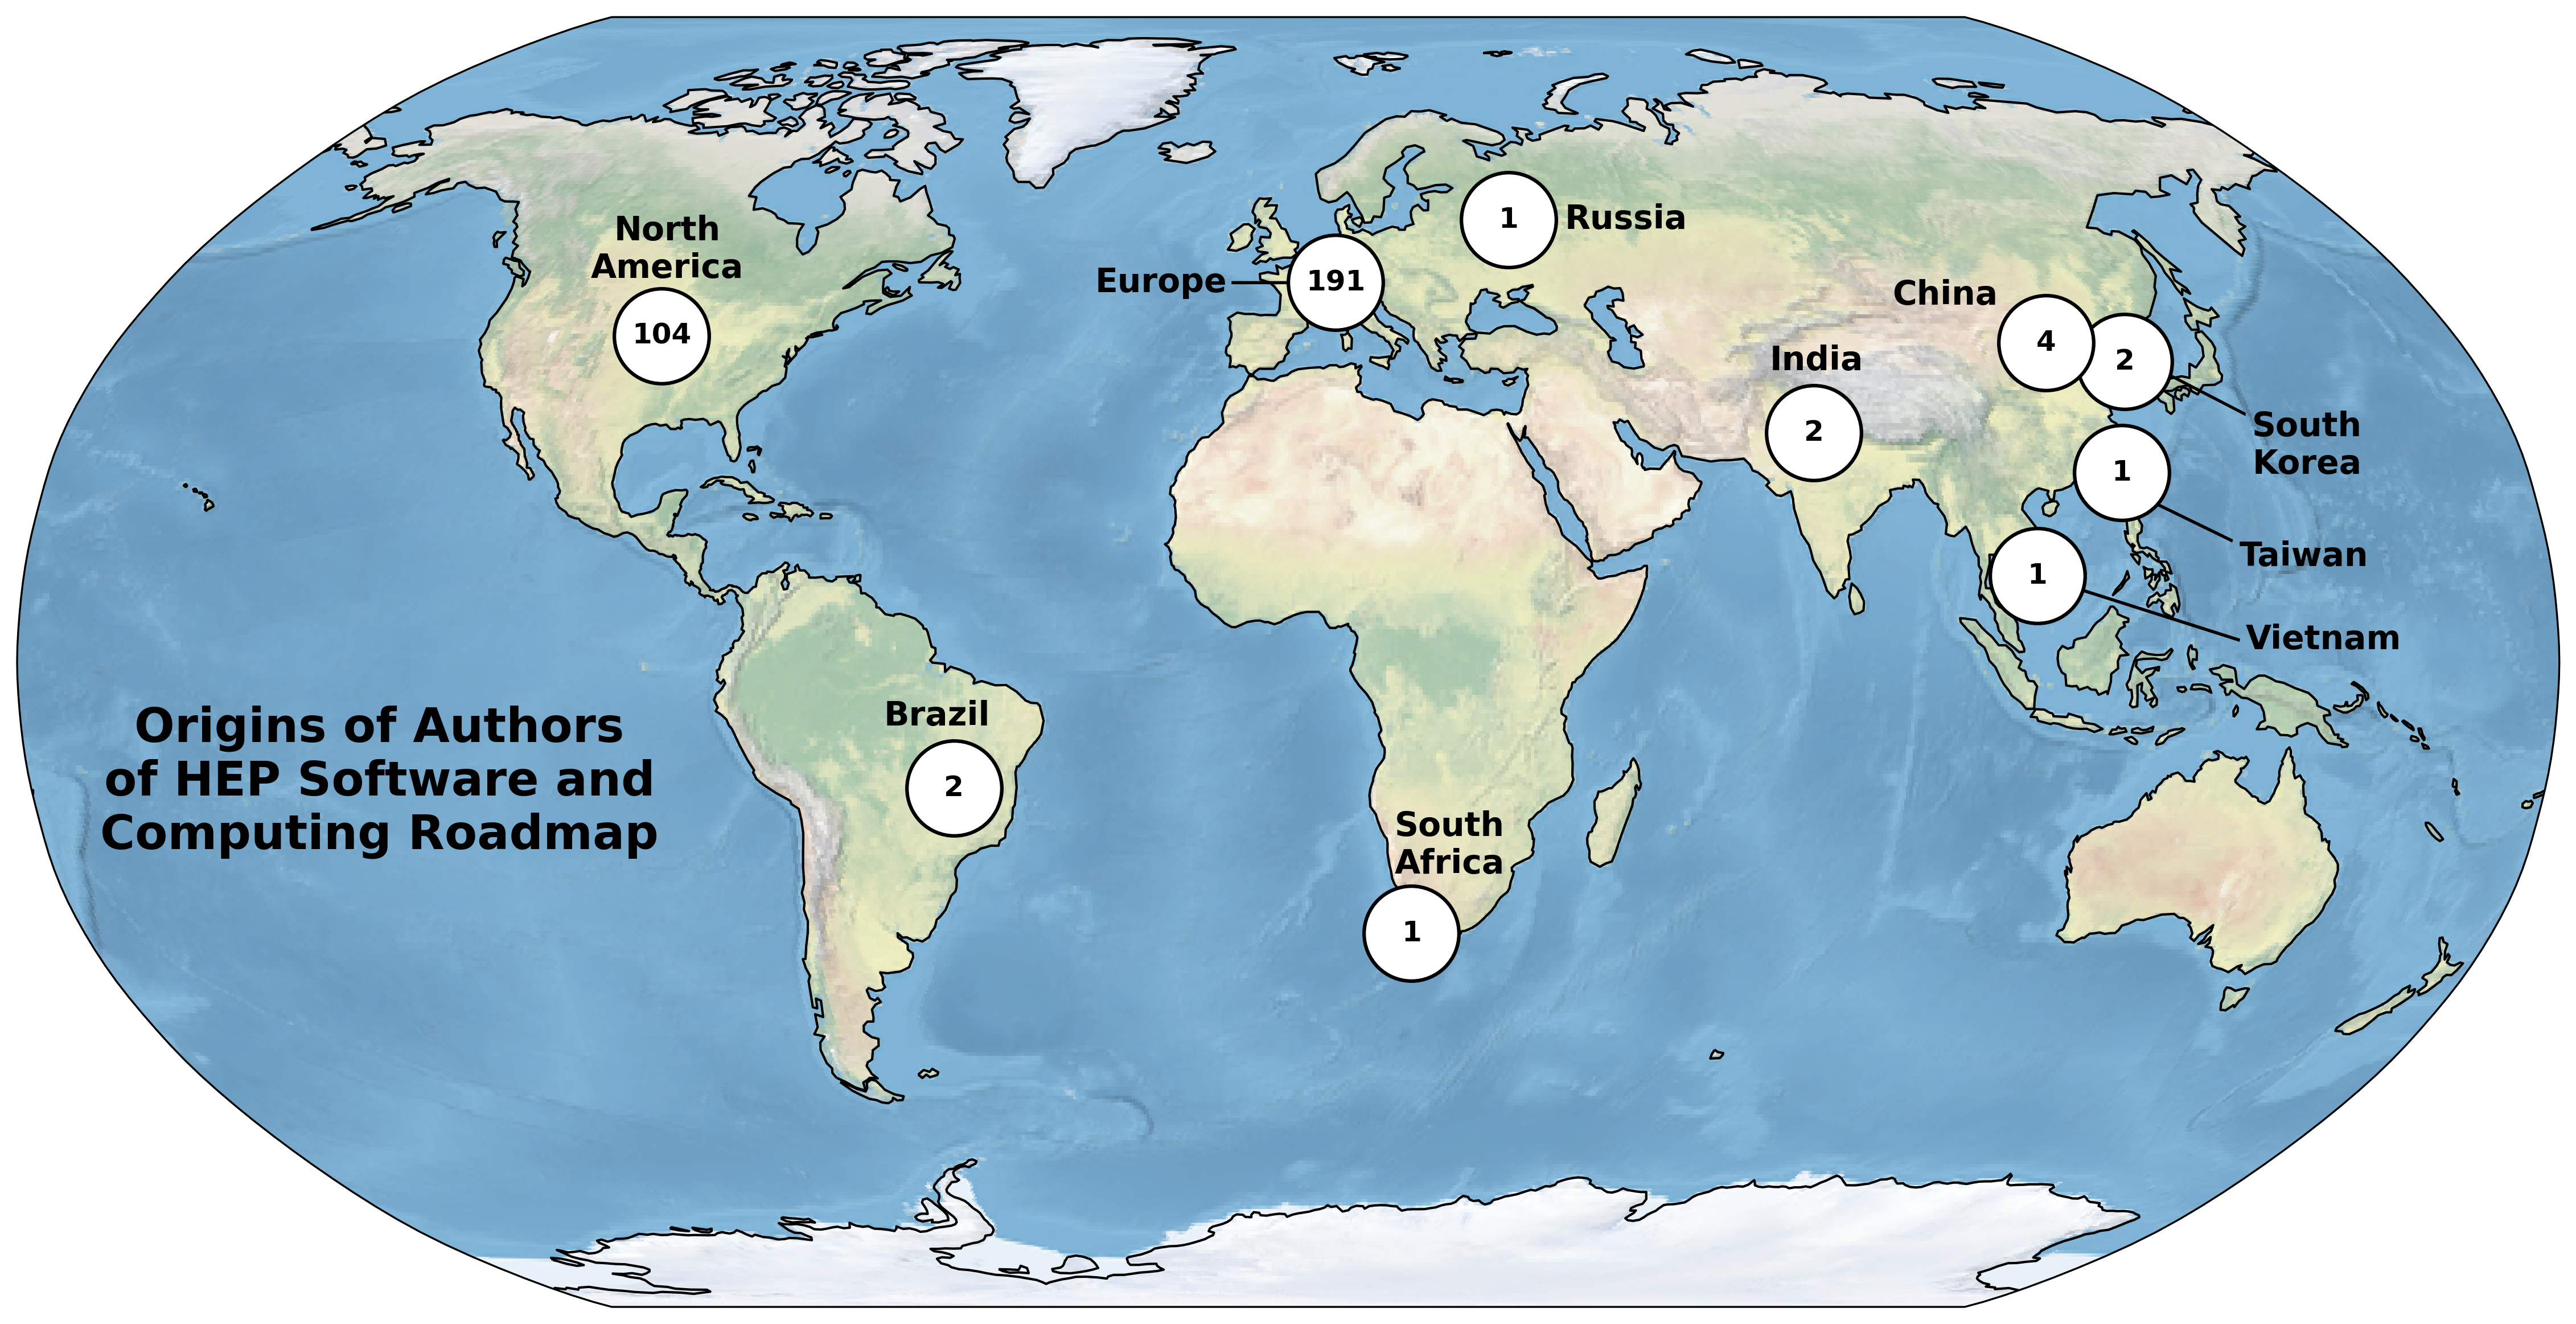

In [153]:
fig = plt.figure(figsize=(20, 10),dpi=300)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

# make the map global rather than have it zoom in to
# the extents of any plotted data
ax.set_global()

ax.stock_img()
ax.coastlines()

#ax.plot(-0.08, 51.53, 'o', transform=ccrs.PlateCarree())
#ax.plot([-0.08, 132], [51.53, 43.17], transform=ccrs.PlateCarree())
#ax.plot([-0.08, 132], [51.53, 43.17], transform=ccrs.Geodetic())

plotdata=[(-96.702606,40.813599,104), # North America, use Lincoln, NE
          (7.588576,47.559601,191),   # Europe, use Basel, Switzerland
          (127.024612,37.532600,2),   # South Korea
          (120.9605,23.6978,1),       # Taiwan
          (37.618423,55.751244,1),    # Russia, use Moscow
          (116.383331,39.916668,4),   # China, use Beijing
          (77.216721,28.644800,2),    # India, use Delhi
          (106.660172,10.762622,1),   # Vietnam, use Saigon/HCMC
          (-47.882778,-15.793889,2),   # Brazil, use Brasilia
          (18.423300,-33.918861,1),   # South Africa, use Cape Town
         ]

for mypoint in plotdata:
    mylongitude,mylatitude,myval = mypoint
    ax.text(mylongitude, mylatitude, str(myval), weight='bold', fontsize=12,
        horizontalalignment='center',
        verticalalignment='center',
        transform=ccrs.PlateCarree())
    ax.plot(mylongitude,mylatitude,
        color='white', linewidth=2, marker='o', markersize=40,
        markeredgewidth=1.5, markeredgecolor=(0, 0, 0, 1),
        transform=ccrs.PlateCarree()
         )

    
labeldata=[(-96.702606-6,40.813599+11,'North\nAmerica'), # North America, use Lincoln, NE
          (7.588576-28,47.559601,'Europe'),   # Europe, use Basel, Switzerland
          (127.024612+22,37.532600-10.5,'South\nKorea'),   # South Korea
          (120.9605+24,23.6978-10.5,'Taiwan'),       # Taiwan
          (37.618423+20,55.751244,'Russia'),    # Russia, use Moscow
          (116.383331-12,39.916668+6,'China'),   # China, use Beijing
          (77.216721+3,28.644800+9,'India'),    # India, use Delhi
          (106.660172+40,10.762622-8,'Vietnam'),   # Vietnam, use Saigon/HCMC
          (-47.882778-2,-15.793889+9,'Brazil'),   # Brazil, use Brasilia
          (18.423300+5,-33.918861+11,'South\nAfrica'),   # South Africa, use Cape Town
         ]    

for mylabel in labeldata:
    mylongitude,mylatitude,mytext = mylabel
    ax.text(mylongitude, mylatitude, str(mytext), weight='bold', fontsize=14,
        horizontalalignment='center',
        verticalalignment='center',
        transform=ccrs.PlateCarree())

# Touch up with some arrows by hand
ax.arrow(120.9605+14,23.6978-8.5, -14, 6.5, width = 0.1,transform=ccrs.PlateCarree())
ax.arrow(127.024612+14.5,37.532600-6.5, -18.5, 10.5, width = 0.1,transform=ccrs.PlateCarree())
ax.arrow(106.660172+28,10.762622-8, -28, 8, width = 0.1,transform=ccrs.PlateCarree())
ax.arrow(7.588576-16.5,47.559601, 16.5, 0, width = 0.1,transform=ccrs.PlateCarree())

# Title
mytitle="Origins of Authors\nof HEP Software and\nComputing Roadmap"
mylongitude=-130
mylatitude=-15
ax.text(mylongitude, mylatitude, mytitle, weight='bold', fontsize=20,
        horizontalalignment='center',
        verticalalignment='center',
        transform=ccrs.PlateCarree())